In [16]:
!pip install pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pickle

# Load the data
file_path = "US_Heart_Patients.csv"
data = pd.read_csv(file_path)

# Display the first 10 rows of the data
print("First 10 rows of the data:")
print(data.head(10))

First 10 rows of the data:
   Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   
5  Female  43.0        2.0            0.0         0.0      0.0   
6  Female  63.0        1.0            0.0         0.0      0.0   
7  Female  45.0        2.0            1.0        20.0      0.0   
8    Male  52.0        1.0            0.0         0.0      0.0   
9    Male  43.0        1.0            1.0        30.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0


5-point summary:
               age    education  currentSmoker   cigsPerDay      BP Meds  \
count  4238.000000  4130.000000    4237.000000  4209.000000  4180.000000   
mean     49.579283     1.979903       0.494218     9.001901     0.029665   
std       8.572875     1.019943       0.500026    11.920742     0.169682   
min      32.000000     1.000000       0.000000     0.000000     0.000000   
25%      42.000000     1.000000       0.000000     0.000000     0.000000   
50%      49.000000     2.000000       0.000000     0.000000     0.000000   
75%      56.000000     3.000000       1.000000    20.000000     0.000000   
max      70.000000     4.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes  tot cholesterol  \
count      4231.000000   4238.000000  4238.000000      4180.000000   
mean          0.005909      0.310524     0.025720       236.677273   
std           0.076650      0.462763     0.158316        44.616098   
min           0.0

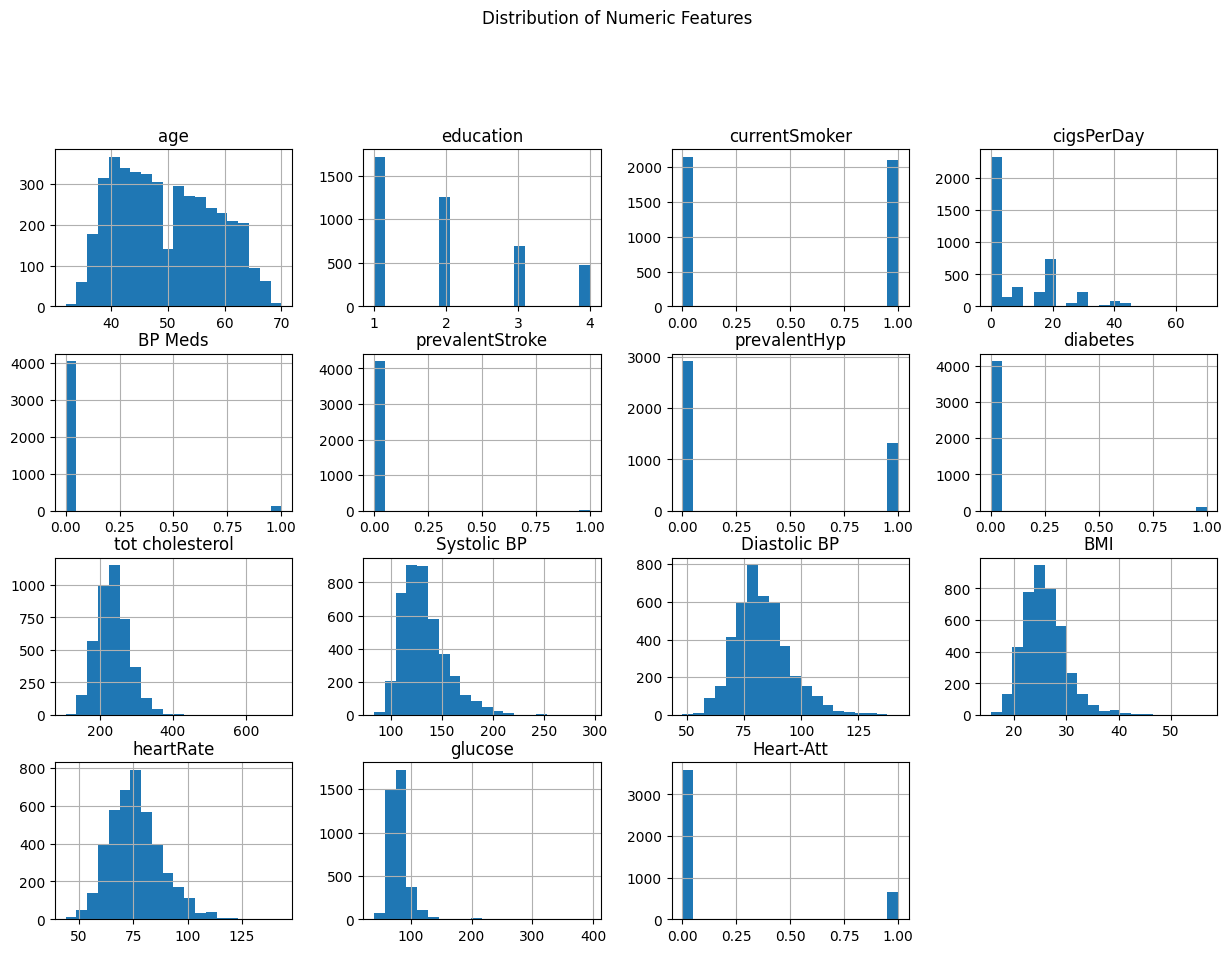

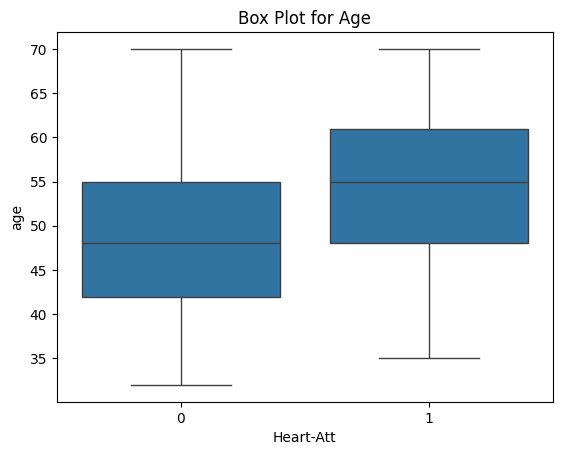

In [18]:
# Display 5-point summary
print("\n5-point summary:")
print(data.describe())

# Information about the columns
print("\nInformation about the columns:")
print(data.info())

# Number of outliers (assuming 'age' is a numeric column)
outliers_age = data[(data['age'] < data['age'].quantile(0.25) - 1.5 * (data['age'].quantile(0.75) - data['age'].quantile(0.25))) |
                    (data['age'] > data['age'].quantile(0.75) + 1.5 * (data['age'].quantile(0.75) - data['age'].quantile(0.25)))]

print("\nNumber of outliers:")
print(len(outliers_age))

# Encoding categorical features
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Correlation between numeric variables
correlation_matrix = data_encoded.select_dtypes(include=['float64', 'int64']).corr()
print("\nCorrelation between numeric variables:")
print(correlation_matrix)

# Distribution of the data
numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_encoded[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()

# Box plot for age
sns.boxplot(x=data_encoded['Heart-Att'], y=data_encoded['age'])
plt.title("Box Plot for Age")
plt.show()


In [19]:
# Data Preprocessing

# Impute missing values
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Outlier treatment
data['age'] = data['age'].clip(lower=data['age'].quantile(0.05), upper=data['age'].quantile(0.95))

# Encoding categorical features for modeling
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [20]:
# Split the data into 80% training and 20% testing
X = data.drop("Heart-Att", axis=1)
y = data["Heart-Att"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Naïve Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_train_pred_nb = naive_bayes_model.predict(X_train)
y_test_pred_nb = naive_bayes_model.predict(X_test)
f1_nb = f1_score(y_test, y_test_pred_nb)

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_train_pred_dt = decision_tree_model.predict(X_train)
y_test_pred_dt = decision_tree_model.predict(X_test)
f1_dt = f1_score(y_test, y_test_pred_dt)

# Pick the best model (based on F1 score)
best_model = naive_bayes_model if f1_nb > f1_dt else decision_tree_model

# Confusion matrix and classification report for the best model
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
class_report = classification_report(y_test, best_model.predict(X_test))

print("\nF1 Score - Naïve Bayes:", f1_nb)
print("F1 Score - Decision Tree:", f1_dt)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


F1 Score - Naïve Bayes: 0.22702702702702704
F1 Score - Decision Tree: 0.20610687022900764

Confusion Matrix:
[[684  41]
 [102  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       725
           1       0.34      0.17      0.23       123

    accuracy                           0.83       848
   macro avg       0.60      0.56      0.57       848
weighted avg       0.79      0.83      0.81       848



In [22]:
# Save the final model as a pickle file
with open("Heart_Patient_Final_Model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)